In [2]:
import pickle
import numpy as np

In [3]:
from transformers import BertLMHeadModel, BartTokenizer
from data import ZuCo_dataset

In [4]:
task_name = "task1, task2, taskNRv2"

In [5]:
''' set up dataloader '''
whole_dataset_dicts = []
if 'task1' in task_name:
    dataset_path_task1 = r"I:\Science\CIS-YASHMOSH\niallmcguire\ZuCo\task1-SR\pickle\task1-SR-dataset.pickle"
    with open(dataset_path_task1, 'rb') as handle:
        whole_dataset_dicts.append(pickle.load(handle))
if 'task2' in task_name:
    dataset_path_task2 = r"I:\Science\CIS-YASHMOSH\niallmcguire\ZuCo\task2-NR\pickle\task2-NR-dataset.pickle"
    with open(dataset_path_task2, 'rb') as handle:
        whole_dataset_dicts.append(pickle.load(handle))
if 'task3' in task_name:
    dataset_path_task3 = r"I:\Science\CIS-YASHMOSH\niallmcguire\ZuCo\task3-TSR\pickle\task3-TSR-dataset.pickle"
    with open(dataset_path_task3, 'rb') as handle:
        whole_dataset_dicts.append(pickle.load(handle))
if 'taskNRv2' in task_name:
    dataset_path_taskNRv2 = r"I:\Science\CIS-YASHMOSH\niallmcguire\ZuCo\task2-NR-2.0\pickle\task2-NR-2.0-dataset.pickle"
    with open(dataset_path_taskNRv2, 'rb') as handle:
        whole_dataset_dicts.append(pickle.load(handle))

In [17]:
print("Loaded in", len(whole_dataset_dicts), "task datasets")

#remove 3rd task
del whole_dataset_dicts[2]

Loaded in 4 task datasets


In [18]:
print("Loaded in", len(whole_dataset_dicts), "task datasets")
Task_Dataset_List = whole_dataset_dicts

Loaded in 3 task datasets


In [23]:
unique_words = set()
all_words = []
unique_words_test = set()
all_words_test = []
#print number of unique words in each task
for Task_Dataset in Task_Dataset_List:
    subjects = list(Task_Dataset.keys())
    print('[INFO]using subjects: ', subjects)
    total_num_sentence = len(Task_Dataset[subjects[0]])
    print(f'[INFO]total number of sentences = {total_num_sentence}')

    train_divider = int(0.8*total_num_sentence)
    dev_divider = train_divider + int(0.1*total_num_sentence)

    for key in subjects:
        for i in range(train_divider):
            if Task_Dataset[key][i] is not None:
                sentence_object = Task_Dataset[key][i]
                for word in sentence_object['word']:
                    unique_words.add(word['content'])
                    all_words.append(word['content'])
        for i in range(dev_divider,total_num_sentence):
            if Task_Dataset[key][i] is not None:
                sentence_object = Task_Dataset[key][i]
                for word in sentence_object['word']:
                    unique_words_test.add(word['content'])
                    all_words_test.append(word['content'])
print(f'[INFO]total number of unique words = {len(unique_words)}')
print(f'[INFO]total number of unique words in test = {len(unique_words_test)}')

[INFO]using subjects:  ['ZAB', 'ZDM', 'ZDN', 'ZGW', 'ZJM', 'ZJN', 'ZJS', 'ZKB', 'ZKH', 'ZMG', 'ZPH']
[INFO]total number of sentences = 400
[INFO]using subjects:  ['ZAB', 'ZDM', 'ZDN', 'ZGW', 'ZJM', 'ZJN', 'ZJS', 'ZKB', 'ZKH', 'ZKW', 'ZMG', 'ZPH']
[INFO]total number of sentences = 300
[INFO]using subjects:  ['YAC', 'YAG', 'YAK', 'YDG', 'YDR', 'YFR', 'YFS', 'YHS', 'YIS', 'YLS', 'YMD', 'YMS', 'YRH', 'YRK', 'YRP', 'YSD', 'YSL', 'YTL']
[INFO]total number of sentences = 349
[INFO]total number of unique words = 5861
[INFO]total number of unique words in test = 1202


In [46]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]
len(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gxb18167\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


106200

In [41]:
from collections import Counter

word_counts = Counter(filtered_words)

# Print the word frequencies
for word, count in word_counts.items():
    print(f"{word}: {count}")

Presents: 11
case: 26
provide: 21
reason: 34
care: 11
beyond: 52
basic: 11
dictums: 10
human: 56
decency.: 9
Beautifully: 20
crafted,: 11
engaging: 11
filmmaking: 10
attract: 9
upscale: 10
audiences: 19
hungry: 11
quality: 10
nostalgic,: 10
twisty: 10
yarn: 4
keep: 32
guessing.: 10
Bread,: 10
Sweet: 11
many: 89
flaws: 9
would: 166
easy: 10
critics: 8
shred: 11
Slow,: 9
silly: 11
unintentionally: 11
hilarious.: 10
Ultimately: 11
feels: 27
emp11111ty: 11
unsatisfying,: 11
like: 109
Communion: 11
wafer: 11
without: 71
wine.: 9
Exudes: 10
Busby: 11
Berkeley: 28
musical: 37
visceral: 30
excitement: 11
sports: 11
extravaganza.: 11
film: 354
rehashes: 11
several: 87
old: 39
themes: 31
capped: 11
pointless: 11
extremes: 11
insanely: 26
violent: 11
graphic.: 10
Ryan: 5
Gosling: 22
is,: 13
word,: 11
conflicted: 32
Daniel.: 10
Deuces: 10
tweaked: 11
notch: 10
become: 108
camp: 9
adventure,: 11
one: 308
movies: 139
that's: 50
starts: 8
good.: 8
film's: 53
stagecrafts: 11
intimate: 11
therefore: 11

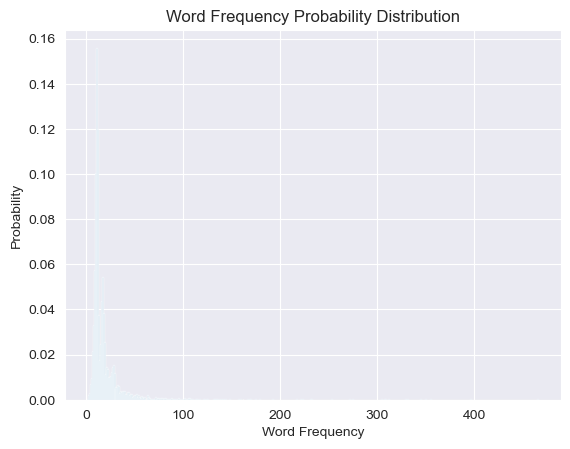

In [42]:
from matplotlib import pyplot as plt
plt.hist(word_counts.values(), bins=range(min(word_counts.values()), max(word_counts.values()) + 1), density=True, alpha=0.75)

# Add labels and title
plt.xlabel('Word Frequency')
plt.ylabel('Probability')
plt.title('Word Frequency Probability Distribution')

# Show the plot
plt.show()

C:\Users\gxb18167\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


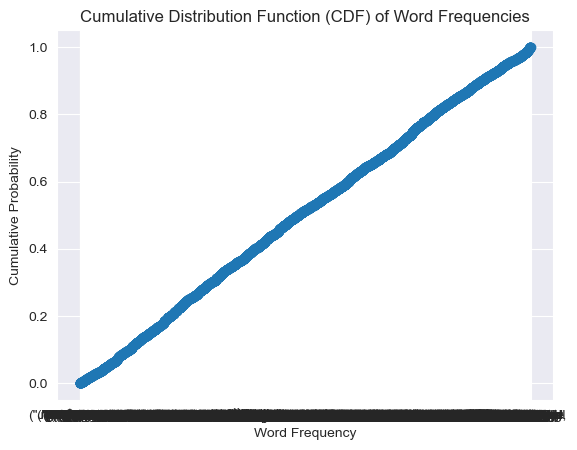

In [43]:


values, counts = zip(*sorted(word_counts.items()))
cumulative = np.cumsum(counts) / sum(counts)

# Plot the CDF
plt.plot(values, cumulative, marker='o')

# Add labels and title
plt.xlabel('Word Frequency')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Word Frequencies')

# Show the plot
plt.show()

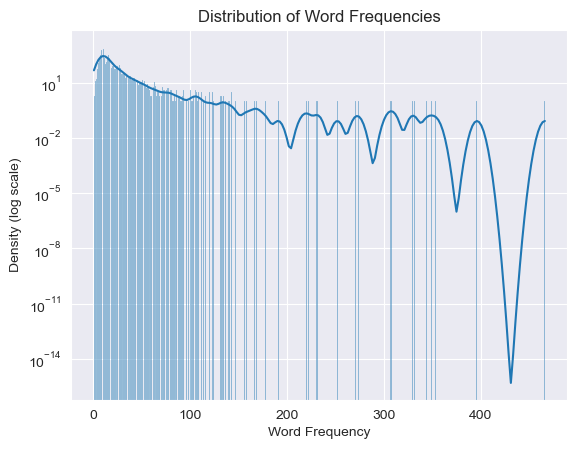

In [44]:
import seaborn as sns
sns.histplot(list(word_counts.values()), kde=True, log_scale=(False, True))

# Add labels and title
plt.xlabel('Word Frequency')
plt.ylabel('Density (log scale)')
plt.title('Distribution of Word Frequencies')

# Show the plot
plt.show()


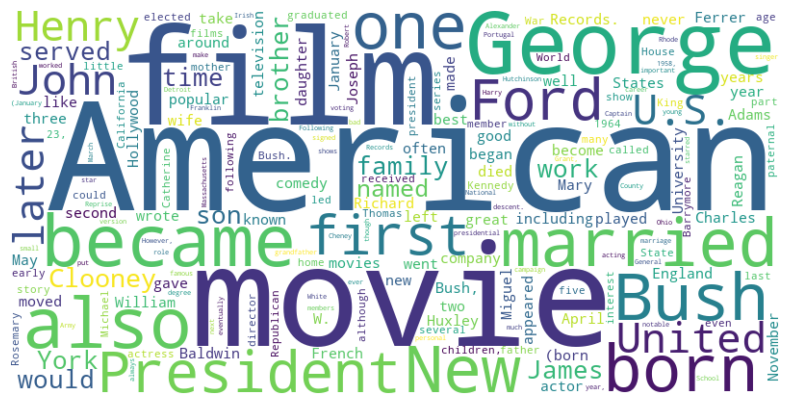

In [45]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gxb18167\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['Presents',
 'case',
 'provide',
 'reason',
 'care',
 'beyond',
 'basic',
 'dictums',
 'human',
 'decency.',
 'Beautifully',
 'crafted,',
 'engaging',
 'filmmaking',
 'attract',
 'upscale',
 'audiences',
 'hungry',
 'quality',
 'nostalgic,',
 'twisty',
 'yarn',
 'keep',
 'guessing.',
 'Bread,',
 'Sweet',
 'many',
 'flaws',
 'would',
 'easy',
 'critics',
 'shred',
 'Slow,',
 'silly',
 'unintentionally',
 'hilarious.',
 'Ultimately',
 'feels',
 'emp11111ty',
 'unsatisfying,',
 'like',
 'Communion',
 'wafer',
 'without',
 'wine.',
 'Exudes',
 'Busby',
 'Berkeley',
 'musical',
 'visceral',
 'excitement',
 'sports',
 'extravaganza.',
 'film',
 'rehashes',
 'several',
 'old',
 'themes',
 'capped',
 'pointless',
 'extremes',
 'insanely',
 'violent',
 'graphic.',
 'Ryan',
 'Gosling',
 'is,',
 'word,',
 'conflicted',
 'Daniel.',
 'Deuces',
 'tweaked',
 'notch',
 'become',
 'camp',
 'adventure,',
 'one',
 'movies',
 "that's",
 'starts',
 'become',
 'good.',
 "film's",
 'stagecrafts',
 'intimate

array([0.19429664, 0.17923741, 0.36307213, 0.50747943, 0.62206709,
       0.51871073, 0.42868289, 0.06850591, 0.28140983, 0.57861644,
       1.08024967, 0.36859021, 0.36467823, 0.41722685, 1.14768839,
       0.55932534, 0.4871715 , 0.79681689, 0.51210332, 0.40454227,
       0.55180544, 0.43953407, 0.75510144, 0.38622764, 0.43004686,
       0.29673383, 0.3575944 , 0.36961138, 0.3506383 , 0.85081506,
       1.26278675, 0.41491231, 0.3718234 , 0.45663175, 0.42179471,
       1.03561676, 0.85461956, 0.43418464, 0.46566522, 0.33808869,
       0.49680769, 0.46951395, 0.50899029, 0.15184164, 1.6930244 ,
       0.76735342, 0.57302761, 0.94475245, 0.7187323 , 1.07659662,
       0.72896671, 1.66536224, 1.39709103, 1.28687668, 1.10441923,
       1.43177247, 1.32517946, 1.66541123, 1.60669196, 1.8083328 ,
       1.39522731, 1.99193358, 1.38413417, 1.54831302, 1.34435618,
       1.0585711 , 0.49228552, 1.85182977, 1.85807848, 1.41647136,
       1.35392964, 1.03962433, 0.85793865, 2.1952467 , 2.17580